### **Exercise 2.5 (programming)**
Design and conduct an experiment to demonstrate the
difficulties that sample-average methods have for nonstationary problems. Use a modified
version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take
independent random walks (say by adding a normally distributed increment with mean
zero and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like
Figure 2.2 for an action-value method using sample averages, incrementally computed,
and another action-value method using a constant step-size parameter, $\alpha = 0.1$. Use
$\epsilon = 0.1$ and longer runs, say of 10,000 steps.

### **Solution**

In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from lib.agent import Agent
from lib.environment import Environment

# For plotting figures inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 5.)
plt.rcParams['axes.titlesize'] = 15.
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14.
plt.rcParams['legend.fontsize'] = 14.
plt.rcParams['legend.loc'] = 'center right'

In [2]:
class Testbed:
    
    def __init__(self, arms, stationary=False):
        self.arms = arms
        self.stationary = stationary
        self.reset()

    def get_reward(self, action):
        reward = np.random.normal(self.q_actuals[action], 1.)
        self.random_walk()
        return reward
    
    def random_walk(self):
        self.q_actuals += np.random.normal(0., 0.01, size=self.arms)
        self.q_optimal = np.amax(self.q_actuals)
        self.optimal_action = np.argmax(self.q_actuals)

    def reset(self):
        self.q_actuals = np.zeros(self.arms)
        self.q_optimal = np.amax(self.q_actuals)
        self.optimal_action = np.argmax(self.q_actuals)

In [3]:
arms = 10
pulls = int(1e4)
iterations = 2000

testbed_ns  = Testbed(arms)
env = Environment(pulls, iterations, testbed_ns)

In [4]:
agent_1 = Agent(arms, strategy='epsilon_greedy', epsilon=0.1)
agent_2 = Agent(arms, strategy='epsilon_greedy', epsilon=0.1, step_size=0.1)

scores_avg_1, optimal_counts_1 = env.run(agent_1)
scores_avg_2, optimal_counts_2 = env.run(agent_2)

epsilon_greedy agent: epsilon=0.1, init_val=0.0, testbed=non-stationary.
------------------------------------------------------------------------


100%|██████████| 2000/2000 [26:38<00:00,  1.25it/s] 


epsilon_greedy agent: epsilon=0.1, step_size=0.1, init_val=0.0, testbed=non-stationary.
---------------------------------------------------------------------------------------


100%|██████████| 2000/2000 [25:09<00:00,  1.32it/s]


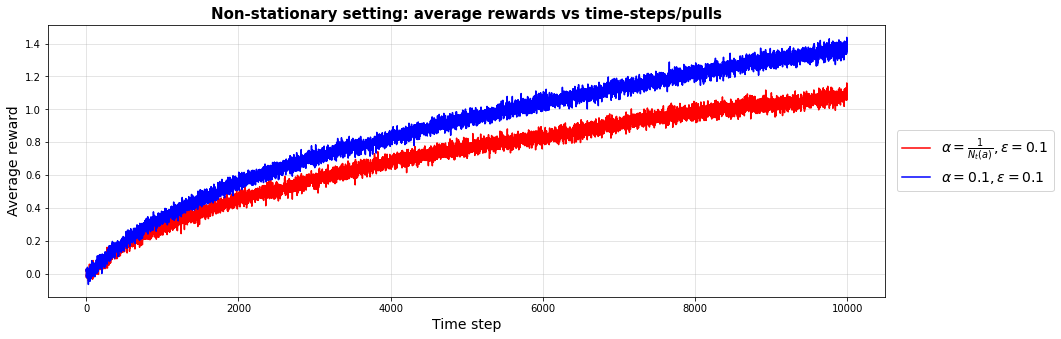

In [5]:
# Plot rewards averaged over runs vs time-steps/pulls
plt.plot(scores_avg_1, color='r')
plt.plot(scores_avg_2, color='b')
plt.title('Non-stationary setting: average rewards vs time-steps/pulls')
plt.xlabel('Time step')
plt.ylabel('Average reward')
plt.legend([r'$\alpha = \frac{1}{N_t(a)}, \epsilon = 0.1$', r'$\alpha = 0.1, \epsilon = 0.1$'], bbox_to_anchor=(1.21, 0.5))
plt.grid(alpha=0.4)
plt.show()

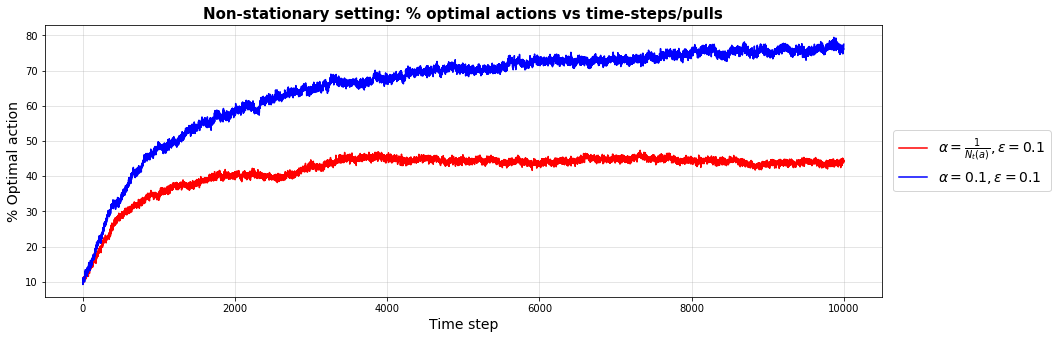

In [6]:
# Plot optimal action counts averaged over runs vs time-steps/pulls
plt.plot(optimal_counts_1, color='r')
plt.plot(optimal_counts_2, color='b')
plt.title('Non-stationary setting: % optimal actions vs time-steps/pulls')
plt.xlabel('Time step')
plt.ylabel('% Optimal action')
plt.legend([r'$\alpha = \frac{1}{N_t(a)}, \epsilon = 0.1$', r'$\alpha = 0.1, \epsilon = 0.1$'], bbox_to_anchor=(1.21, 0.5))
plt.grid(alpha=0.4)
plt.show()